In [178]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tools as tl
import matplotlib.pyplot as plt
import matplotlib.colors as clt
import matplotlib.animation as animation
import re

sns.set_style("ticks")

palette = 'Accent'

path = './figures/paper/4_initial_profile/'
extension = '.png'

top_directory = "./output/" #os.getcwd()
files, runs = tl.view_runs(top_directory)

In [179]:
def prep_image(df, simulation, timestep):    
    image = df[(df['timestep']==timestep)&(df['simulation']==simulation)]['image']
    image = np.genfromtxt([image.values[0].replace('[', '').replace(']', '')])
    image = np.reshape(image, (25,25))
    return(image)

colors = ['#EE8382', '#508991', '#172A3A']
levels = [0, 1, 2]
legend_keys = ['Coral', 'Turf', 'Macroalgae']
cmap_types, norm_types = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')

## for background of plots

output_facecolor = '#EDEDED'

In [180]:
subset = runs[(runs['neighborhood_threshold']==145)&
              (runs['initial_coral_percent']==15)&
              (runs['initial_macroalgae_percent']==40)&
              (runs['number_of_rows']==25)]
subset

,number_of_rows,number_of_columns,grid_option,grazing,neighborhood_threshold,initial_coral_percent,initial_macroalgae_percent,r,d,a,y,number_of_timesteps,record_rate,number_of_simulations,file
0,25,25,0,45,145,15,40,10,40,20,75,2100,10,100,0
2,25,25,0,51,145,15,40,10,40,20,75,2100,10,100,2
5,25,25,0,60,145,15,40,10,40,20,75,2100,10,100,5
7,25,25,0,57,145,15,40,10,40,20,75,2100,10,100,7
10,25,25,0,48,145,15,40,10,40,20,75,2100,10,100,10
16,25,25,0,54,145,15,40,10,40,20,75,2100,10,100,16
21,25,25,2,45,145,15,40,10,40,20,75,2100,10,100,21
22,25,25,2,51,145,15,40,10,40,20,75,2100,10,100,22
23,25,25,2,60,145,15,40,10,40,20,75,2100,10,100,23
24,25,25,2,57,145,15,40,10,40,20,75,2100,10,100,24


In [181]:
df = tl.load_runs(files, subset)
df = tl.split_neighbors(df)
df = tl.add_percent(df)
df['time'] = df['timestep']*.1
df['time'] = df['time'].astype('int')
df['C'] = round(df.coral_percent/100,2)
df['T'] = round(df.turf_percent/100,2)
df['M'] = round(df.macroalgae_percent/100,2)
df['grid option'] = 'none'
df.loc[df['grid_option']==0, ['grid option']] = 'random'
df.loc[df['grid_option']==2, ['grid option']] = 'blob'

In [182]:
times = [0,10,20,30,40,50,60,70,80,90,100]
figsize = (6,2)
simulation = 19

In [183]:
## Pull Images

timestep = 0

df_image = df[(df['grid option']=='blob')&
              (df['grazing']==48)].copy()
initial_blob = prep_image(df_image, simulation=6, timestep=timestep)

df_image = df[(df['grid option']=='random')&
              (df['grazing']==48)].copy()
initial_random = prep_image(df_image, simulation=6, timestep=timestep)


## A. Initial Profiles

In [194]:
# Color Scheme
levels = [0, 1, 2]
colors = ['#EE8382', '#508991', '#172A3A']
type_palette = sns.set_palette(sns.color_palette(colors))
cmap, norm = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')

In [195]:
## Plot Parameters

initial_profile = 'random'
time = 0
name = 'initial_profile' + '_' + initial_profile

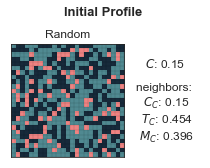

In [196]:
## Plot

data=df[(df['grid option']==initial_profile)&
        (df['grazing']==48)&
        (df['simulation']==simulation)&
        (df['time']==time)] 

image = prep_image(data, simulation, time)

fig, ax = plt.subplots(1,2, figsize=(3.5,2.45), gridspec_kw={'width_ratios': [2, 1]})

ax[0].imshow(image, cmap=cmap, norm=norm)
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[0].set_xticks(np.arange(-.5, data['number_of_rows'].to_numpy()[0], 1), minor=True)
ax[0].set_yticks(np.arange(-.5, data['number_of_rows'].to_numpy()[0], 1), minor=True)
ax[0].set_frame_on(False)
ax[0].grid(color='black', linestyle='-', linewidth=.1, which='minor')
ax[0].tick_params(which='minor',top=[], left=[],right=[], bottom=[])
ax[0].set_frame_on(True)
ax[0].set_title('Random')

ax[1].text(0.35, 0.5,
           '$C$: ' + str(round(data['C'].to_numpy()[0], 2)) + 
           '\n \n' + 'neighbors: ' + 
           '\n $C_C$: ' + str(round(data['coral_coral_neighbors'].to_numpy()[0],3)) + 
           '\n $T_C$: ' + str(round(data['coral_turf_neighbors'].to_numpy()[0],3)) +
           '\n $M_C$: ' + str(round(data['coral_macro_neighbors'].to_numpy()[0],3)),
           size=12, ha='center', va='center')
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)
ax[1].set_frame_on(False)

plt.suptitle("Initial Profile",fontweight='bold',fontsize=13)
fig.subplots_adjust(wspace=0.2, top=.77)
plt.savefig(path + name + extension, dpi=400, bbox_inches = "tight")

In [197]:
## Plot Parameters

initial_profile = 'blob'
time = 0
name = 'time_20' + '_' + initial_profile 

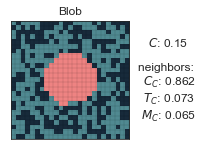

In [198]:
## Plot

data=df[(df['grid option']==initial_profile)&
        (df['grazing']==48)&
        (df['simulation']==simulation)&
        (df['time']==time)] 

image = prep_image(data, simulation, time)

fig, ax = plt.subplots(1,2, figsize=(3.5,2.45), gridspec_kw={'width_ratios': [2, 1]})

ax[0].imshow(image, cmap=cmap, norm=norm)
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[0].set_xticks(np.arange(-.5, data['number_of_rows'].to_numpy()[0], 1), minor=True)
ax[0].set_yticks(np.arange(-.5, data['number_of_rows'].to_numpy()[0], 1), minor=True)
ax[0].set_frame_on(False)
ax[0].grid(color='black', linestyle='-', linewidth=.1, which='minor')
ax[0].tick_params(which='minor',top=[], left=[],right=[], bottom=[])
ax[0].set_frame_on(True)
ax[0].set_title('Blob')

ax[1].text(0.35, 0.5,
           '$C$: ' + str(round(data['C'].to_numpy()[0], 2)) + 
           '\n \n' + 'neighbors: ' + 
           '\n $C_C$: ' + str(round(data['coral_coral_neighbors'].to_numpy()[0],3)) + 
           '\n $T_C$: ' + str(round(data['coral_turf_neighbors'].to_numpy()[0],3)) +
           '\n $M_C$: ' + str(round(data['coral_macro_neighbors'].to_numpy()[0],3)),
           size=12, ha='center', va='center')
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)
ax[1].set_frame_on(False)

#plt.suptitle("Initial Profile",fontweight='bold',fontsize=13)
fig.subplots_adjust(wspace=0.2, top=.8)
plt.savefig(path + name + extension, dpi=400, bbox_inches = "tight")

## B. Images at time t=20

In [201]:
## Plot Parameters

initial_profile = 'blob'
time = 20
grazing = 48
name = 'time_20' + '_' + initial_profile + '_grazing_' + str(grazing)

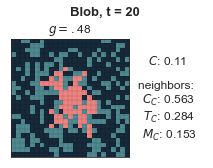

In [202]:
## Plot

data=df[(df['grid option']==initial_profile)&
        (df['grazing']==grazing)&
        (df['simulation']==simulation)&
        (df['time']==time)] 

timestep = time*10

image = prep_image(data, simulation, timestep)

fig, ax = plt.subplots(1,2, figsize=(3.5,2.45), gridspec_kw={'width_ratios': [2, 1]})

ax[0].imshow(image, cmap=cmap, norm=norm)
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[0].set_xticks(np.arange(-.5, data['number_of_rows'].to_numpy()[0], 1), minor=True)
ax[0].set_yticks(np.arange(-.5, data['number_of_rows'].to_numpy()[0], 1), minor=True)
ax[0].set_frame_on(False)
ax[0].grid(color='black', linestyle='-', linewidth=.1, which='minor')
ax[0].tick_params(which='minor',top=[], left=[],right=[], bottom=[])
ax[0].set_frame_on(True)
ax[0].set_title("$g = .$" + str(grazing))

ax[1].text(0.35, 0.5,
           '$C$: ' + str(round(data['C'].to_numpy()[0], 2)) + 
           '\n \n' + 'neighbors: ' + 
           '\n $C_C$: ' + str(round(data['coral_coral_neighbors'].to_numpy()[0],3)) + 
           '\n $T_C$: ' + str(round(data['coral_turf_neighbors'].to_numpy()[0],3)) +
           '\n $M_C$: ' + str(round(data['coral_macro_neighbors'].to_numpy()[0],3)),
           size=12, ha='center', va='center')
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)
ax[1].set_frame_on(False)

plt.suptitle("Blob, t = " + str(time),fontweight='bold',fontsize=13)
fig.subplots_adjust(wspace=0.2, top=.8)
plt.savefig(path + name + extension, dpi=400, bbox_inches = "tight", facecolor=output_facecolor)

In [203]:
## Plot Parameters

initial_profile = 'random'
time = 20
name = 'time_20' + '_' + initial_profile + '_grazing_' + str(grazing)

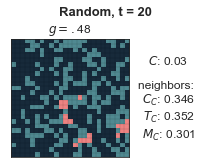

In [204]:
## Plot

data=df[(df['grid option']==initial_profile)&
        (df['grazing']==grazing)&
        (df['simulation']==simulation)&
        (df['time']==time)] 

timestep = time*10

image = prep_image(data, simulation, timestep)

fig, ax = plt.subplots(1,2, figsize=(3.5,2.45), gridspec_kw={'width_ratios': [2, 1]})

ax[0].imshow(image, cmap=cmap, norm=norm)
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[0].set_xticks(np.arange(-.5, data['number_of_rows'].to_numpy()[0], 1), minor=True)
ax[0].set_yticks(np.arange(-.5, data['number_of_rows'].to_numpy()[0], 1), minor=True)
ax[0].set_frame_on(False)
ax[0].grid(color='black', linestyle='-', linewidth=.1, which='minor')
ax[0].tick_params(which='minor',top=[], left=[],right=[], bottom=[])
ax[0].set_frame_on(True)
ax[0].set_title("$g = .$" + str(grazing))


ax[1].text(0.35, 0.5,
           '$C$: ' + str(round(data['C'].to_numpy()[0], 2)) + 
           '\n \n' + 'neighbors: ' + 
           '\n $C_C$: ' + str(round(data['coral_coral_neighbors'].to_numpy()[0],3)) + 
           '\n $T_C$: ' + str(round(data['coral_turf_neighbors'].to_numpy()[0],3)) +
           '\n $M_C$: ' + str(round(data['coral_macro_neighbors'].to_numpy()[0],3)),
           size=12, ha='center', va='center')
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)
ax[1].set_frame_on(False)

plt.suptitle("Random, t = " + str(time),fontweight='bold',fontsize=13)

fig.subplots_adjust(wspace=0.2, top=.8)
plt.savefig(path + name + extension, dpi=400, bbox_inches = "tight", facecolor=output_facecolor)

In [205]:
## Grazing = 57

In [207]:
## Plot Parameters

initial_profile = 'blob'
time = 20
grazing = 57
name = 'time_20' + '_' + initial_profile + '_grazing_' + str(grazing)

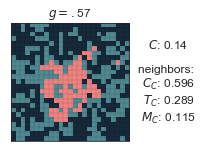

In [208]:
## Plot

data=df[(df['grid option']==initial_profile)&
        (df['grazing']==grazing)&
        (df['simulation']==simulation)&
        (df['time']==time)] 

timestep = time*10

image = prep_image(data, simulation, timestep)

fig, ax = plt.subplots(1,2, figsize=(3.5,2.45), gridspec_kw={'width_ratios': [2, 1]})

ax[0].imshow(image, cmap=cmap, norm=norm)
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[0].set_xticks(np.arange(-.5, data['number_of_rows'].to_numpy()[0], 1), minor=True)
ax[0].set_yticks(np.arange(-.5, data['number_of_rows'].to_numpy()[0], 1), minor=True)
ax[0].set_frame_on(False)
ax[0].grid(color='black', linestyle='-', linewidth=.1, which='minor')
ax[0].tick_params(which='minor',top=[], left=[],right=[], bottom=[])
ax[0].set_frame_on(True)
ax[0].set_title("$g = .$" + str(grazing))

ax[1].text(0.35, 0.5,
           '$C$: ' + str(round(data['C'].to_numpy()[0], 2)) + 
           '\n \n' + 'neighbors: ' + 
           '\n $C_C$: ' + str(round(data['coral_coral_neighbors'].to_numpy()[0],3)) + 
           '\n $T_C$: ' + str(round(data['coral_turf_neighbors'].to_numpy()[0],3)) +
           '\n $M_C$: ' + str(round(data['coral_macro_neighbors'].to_numpy()[0],3)),
           size=12, ha='center', va='center')
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)
ax[1].set_frame_on(False)

#plt.suptitle("t = " + str(time) + ", g = ." + str(grazing),fontweight='bold',fontsize=13)
fig.subplots_adjust(wspace=0.2, top=.8)
plt.savefig(path + name + extension, dpi=400, bbox_inches = "tight", facecolor=output_facecolor)

In [209]:
## Plot Parameters

initial_profile = 'random'
time = 20
grazing = 57
name = 'time_20' + '_' + initial_profile + '_grazing_' + str(grazing)

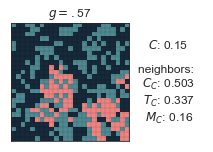

In [210]:
## Plot

data=df[(df['grid option']==initial_profile)&
        (df['grazing']==grazing)&
        (df['simulation']==simulation)&
        (df['time']==time)] 

timestep = time*10

image = prep_image(data, simulation, timestep)

fig, ax = plt.subplots(1,2, figsize=(3.5,2.45), gridspec_kw={'width_ratios': [2, 1]})

ax[0].imshow(image, cmap=cmap, norm=norm)
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[0].set_xticks(np.arange(-.5, data['number_of_rows'].to_numpy()[0], 1), minor=True)
ax[0].set_yticks(np.arange(-.5, data['number_of_rows'].to_numpy()[0], 1), minor=True)
ax[0].set_frame_on(False)
ax[0].grid(color='black', linestyle='-', linewidth=.1, which='minor')
ax[0].tick_params(which='minor',top=[], left=[],right=[], bottom=[])
ax[0].set_frame_on(True)
ax[0].set_title("$g = .$" + str(grazing))


ax[1].text(0.35, 0.5,
           '$C$: ' + str(round(data['C'].to_numpy()[0], 2)) + 
           '\n \n' + 'neighbors: ' + 
           '\n $C_C$: ' + str(round(data['coral_coral_neighbors'].to_numpy()[0],3)) + 
           '\n $T_C$: ' + str(round(data['coral_turf_neighbors'].to_numpy()[0],3)) +
           '\n $M_C$: ' + str(round(data['coral_macro_neighbors'].to_numpy()[0],3)),
           size=12, ha='center', va='center')
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)
ax[1].set_frame_on(False)

fig.subplots_adjust(wspace=0.2, top=.8)
plt.savefig(path + name + extension, dpi=400, bbox_inches = "tight", facecolor=output_facecolor)

## C. Box Plot of Evolution

## Grazing == .48

In [211]:
grazing=48

In [212]:
subset = runs[(runs['neighborhood_threshold']==145)&
              (runs['initial_coral_percent']==15)&
              (runs['initial_macroalgae_percent']==40)&
              (runs['number_of_rows']==25)&
              (runs['grazing']==grazing)]
subset

,number_of_rows,number_of_columns,grid_option,grazing,neighborhood_threshold,initial_coral_percent,initial_macroalgae_percent,r,d,a,y,number_of_timesteps,record_rate,number_of_simulations,file
10,25,25,0,48,145,15,40,10,40,20,75,2100,10,100,10
25,25,25,2,48,145,15,40,10,40,20,75,2100,10,100,25


In [213]:
df = tl.load_runs(files, subset)
df = tl.split_neighbors(df)
df = tl.add_percent(df)
df['time'] = df['timestep']*.1
df['time'] = df['time'].astype('int')
df['C'] = round(df.coral_percent/100,2)
df['T'] = round(df.turf_percent/100,2)
df['M'] = round(df.macroalgae_percent/100,2)
df['grid option'] = 'none'
df.loc[df['grid_option']==0, ['grid option']] = 'random'
df.loc[df['grid_option']==2, ['grid option']] = 'blob'

In [214]:
colors = ["#e0e0e0", "#4571ff"]
# Set your custom color palette
profile_palette = sns.set_palette(sns.color_palette(colors))

No handles with labels found to put in legend.


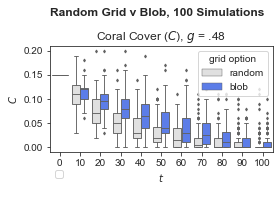

In [215]:
# Grouped boxplot

name= 'coral_cover_g_' + str(grazing) + '_blob_v_random' 

fig, ax = plt.subplots(2,1, figsize=(4,3), gridspec_kw={'height_ratios': [2, .5]})

sns.boxplot(x="time", y="C", hue="grid option", data=df[df['time'].isin(times)], palette=profile_palette, linewidth=.9, flierprops=dict(markersize=2),
            ax=ax[0])

ax[0].set_title("Coral Cover ($C$), $g$ = ."+str(grazing))

#plt.suptitle('Evolution of Random Grid v Blob, 100 Simulations each, $g$ = .'+str(grazing), fontsize =12, fontweight='bold')

ax[1].axis("off")

plt.suptitle('Random Grid v Blob, 100 Simulations', fontsize =12, fontweight='bold')
plt.legend(loc='upper left')
ax[0].set_ylabel("$C$")
ax[0].set_xlabel("$t$")

fig.subplots_adjust(top=.8)

plt.savefig(path + name + extension, dpi=200, bbox_inches = "tight", facecolor=output_facecolor)

## Grazing == .57

In [163]:
grazing=57

In [164]:
subset = runs[(runs['neighborhood_threshold']==145)&
              (runs['initial_coral_percent']==15)&
              (runs['initial_macroalgae_percent']==40)&
              (runs['number_of_rows']==25)&
              (runs['grazing']==grazing)]
subset

,number_of_rows,number_of_columns,grid_option,grazing,neighborhood_threshold,initial_coral_percent,initial_macroalgae_percent,r,d,a,y,number_of_timesteps,record_rate,number_of_simulations,file
7,25,25,0,57,145,15,40,10,40,20,75,2100,10,100,7
24,25,25,2,57,145,15,40,10,40,20,75,2100,10,100,24


In [165]:
df = tl.load_runs(files, subset)
df = tl.split_neighbors(df)
df = tl.add_percent(df)
df['time'] = df['timestep']*.1
df['time'] = df['time'].astype('int')
df['C'] = round(df.coral_percent/100,2)
df['T'] = round(df.turf_percent/100,2)
df['M'] = round(df.macroalgae_percent/100,2)
df['grid option'] = 'none'
df.loc[df['grid_option']==0, ['grid option']] = 'random'
df.loc[df['grid_option']==2, ['grid option']] = 'blob'

In [166]:
colors = ["#e0e0e0", "#4571ff"]
# Set your custom color palette
profile_palette = sns.set_palette(sns.color_palette(colors))

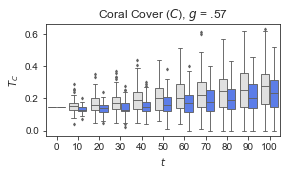

In [171]:
# Grouped boxplot

name= 'coral_cover_g_' + str(grazing) + '_blob_v_random' 

fig, ax = plt.subplots(figsize=(4.2,2.3))

sns.boxplot(x="time", y="C", 
            hue="grid option", data=df[df['time'].isin(times)], 
            palette=profile_palette, linewidth=.9, flierprops=dict(markersize=2))

ax.get_legend().set_title('')

plt.title("Coral Cover ($C$), $g$ = ."+str(grazing))
plt.xlabel('$t$')
plt.ylabel('$T_C$')
plt.legend([],[], frameon=False)
fig.subplots_adjust(top=.8)

plt.savefig(path + name + extension, dpi=200, bbox_inches = "tight", facecolor=output_facecolor)

## Grazing == .54

In [131]:
grazing=54

In [132]:
subset = runs[(runs['neighborhood_threshold']==145)&
              (runs['initial_coral_percent']==15)&
              (runs['initial_macroalgae_percent']==40)&
              (runs['number_of_rows']==25)&
              (runs['grazing']==grazing)]
subset

,number_of_rows,number_of_columns,grid_option,grazing,neighborhood_threshold,initial_coral_percent,initial_macroalgae_percent,r,d,a,y,number_of_timesteps,record_rate,number_of_simulations,file
16,25,25,0,54,145,15,40,10,40,20,75,2100,10,100,16
26,25,25,2,54,145,15,40,10,40,20,75,2100,10,100,26


In [133]:
df = tl.load_runs(files, subset)
df = tl.split_neighbors(df)
df = tl.add_percent(df)
df['time'] = df['timestep']*.1
df['time'] = df['time'].astype('int')
df['C'] = round(df.coral_percent/100,2)
df['T'] = round(df.turf_percent/100,2)
df['M'] = round(df.macroalgae_percent/100,2)
df['grid option'] = 'none'
df.loc[df['grid_option']==0, ['grid option']] = 'random'
df.loc[df['grid_option']==2, ['grid option']] = 'blob'

In [134]:
colors = ["#e0e0e0", "#4571ff"]
# Set your custom color palette
profile_palette = sns.set_palette(sns.color_palette(colors))

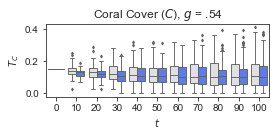

In [135]:
# Grouped boxplot

name= 'coral_cover_g_' + str(grazing) + '_blob_v_random' 

fig, ax = plt.subplots(figsize=(4,1.5))

sns.boxplot(x="time", y="C", 
            hue="grid option", data=df[df['time'].isin(times)], 
            palette=profile_palette, linewidth=.9, flierprops=dict(markersize=2))

ax.get_legend().set_title('')

plt.title("Coral Cover ($C$), $g$ = ."+str(grazing))
plt.xlabel('$t$')
plt.ylabel('$T_C$')
plt.legend([],[], frameon=False)
fig.subplots_adjust(top=.8)

plt.savefig(path + name + extension, dpi=200, bbox_inches = "tight", facecolor=output_facecolor)

In [ ]:
name= 'coral_turf_g_' + str(grazing) + '_blob_v_random'

fig, ax = plt.subplots(figsize=(4,1.9))

sns.boxplot(x="time", y="coral_turf_neighbors", 
            hue="grid option", data=df[df['time'].isin(times)], 
            palette=profile_palette, linewidth=.9, flierprops=dict(markersize=2)
           )

ax.get_legend().set_title('')

plt.title('Coral-Turf Neighbors ($T_C$), $g$ = .'+str(grazing))
plt.xlabel('$t$')
plt.ylabel('$T_C$')
plt.legend([],[], frameon=False)
plt.savefig(path + name + extension, dpi=200, bbox_inches = "tight")


In [ ]:
name='grazing_' + str(grazing) + 'blob_v_random_coral_coral_neighbors_low_initial'

plt.figure(figsize=figsize)
sns.boxplot(x="time", y='coral_coral_neighbors', 
            hue="grid option", data=df[df['time'].isin(times)], 
            palette=profile_palette, linewidth=.9, flierprops=dict(markersize=2)
           ).set(ylabel='$C_C$')

plt.title('Coral-Coral Neighbors ($C_C$)')
plt.xlabel('$t$')
plt.legend([],[], frameon=False)
plt.savefig(path + name + extension, dpi=200, bbox_inches = "tight")

In [ ]:
name= 'grazing_' + str(grazing) + 'blob_v_random_coral_macro_neighbors_low_initial'

plt.figure(figsize=figsize)
sns.boxplot(x="time", y='coral_macro_neighbors', 
            hue="grid option", data=df[df['time'].isin(times)], 
            palette=profile_palette, linewidth=.9, flierprops=dict(markersize=2)
           ).set(ylabel='$M_C$')
plt.title('Coral-Macro Neighbors ($M_C$)')
plt.xlabel('$t$')

plt.legend([],[], frameon=False)                                 
plt.savefig(path + name + extension, dpi=200, bbox_inches = "tight")

## Grazing == .57

In [ ]:
grazing = 57

In [ ]:
subset = runs[(runs['neighborhood_threshold']==145)&
              (runs['initial_coral_percent']==15)&
              (runs['initial_macroalgae_percent']==40)&
              (runs['number_of_rows']==25)&
              (runs['grazing']==grazing)]
subset

In [ ]:
df = tl.load_runs(files, subset)
df = tl.split_neighbors(df)
df = tl.add_percent(df)
df['time'] = df['timestep']*.1
df['time'] = df['time'].astype('int')
df['C'] = round(df.coral_percent/100,2)
df['T'] = round(df.turf_percent/100,2)
df['M'] = round(df.macroalgae_percent/100,2)
df['grid option'] = 'none'
df.loc[df['grid_option']==0, ['grid option']] = 'random'
df.loc[df['grid_option']==2, ['grid option']] = 'blob'

In [ ]:
# Grouped boxplot

name= 'grazing_' + str(grazing) + 'blob_v_random_coral_percent_low_initial_multi' 

plt.figure(figsize=figsize)

sns.boxplot(x="time", y="C", 
            hue="grid option", data=df[df['time'].isin(times)], 
            palette=profile_palette, linewidth=.9, flierprops=dict(markersize=2))

plt.title('Evolution of Random Grid v Blob, 100 Simulations each, $g$ = .'+str(grazing) + '\n \n Coral Cover ($C$)')

plt.legend(loc='upper left')
plt.ylabel("$C$")
plt.xlabel("$t$")

plt.savefig(path + name + extension, dpi=200, bbox_inches = "tight")

In [ ]:
name='grazing_' + str(grazing) + 'blob_v_random_coral_turf_neighbors_low_initial'

fig, ax = plt.subplots(figsize=figsize)

sns.boxplot(x="time", y="coral_turf_neighbors", 
            hue="grid option", data=df[df['time'].isin(times)], 
            palette=profile_palette, linewidth=.9, flierprops=dict(markersize=2)
           ).set(ylabel='$T_C$')

ax.get_legend().set_title('')

plt.title('Coral-Turf Neighbors ($T_C$)')
plt.xlabel('$t$')
plt.legend([],[], frameon=False)
plt.savefig(path + name + extension, dpi=200, bbox_inches = "tight")


In [ ]:
name='grazing_' + str(grazing) + 'blob_v_random_coral_coral_neighbors_low_initial'

plt.figure(figsize=figsize)
sns.boxplot(x="time", y='coral_coral_neighbors', 
            hue="grid option", data=df[df['time'].isin(times)], 
            palette=profile_palette, linewidth=.9, flierprops=dict(markersize=2)
           ).set(ylabel='$C_C$')

plt.title('Coral-Coral Neighbors ($C_C$)')
plt.xlabel('$t$')
plt.legend([],[], frameon=False)
plt.savefig(path + name + extension, dpi=200, bbox_inches = "tight")

In [ ]:
name= 'grazing_' + str(grazing) + 'blob_v_random_coral_macro_neighbors_low_initial'

plt.figure(figsize=figsize)
sns.boxplot(x="time", y='coral_macro_neighbors', 
            hue="grid option", data=df[df['time'].isin(times)], 
            palette=profile_palette, linewidth=.9, flierprops=dict(markersize=2)
           ).set(ylabel='$M_C$')
plt.title('Coral-Macro Neighbors ($M_C$)')
plt.xlabel('$t$')

plt.legend([],[], frameon=False)                                 
plt.savefig(path + name + extension, dpi=200, bbox_inches = "tight")

In [ ]:
## Pull Images

timestep = 0

## g=.48

df_image = df[(df['grid option']=='blob')&
              (df['grazing']==48)].copy()
image_48_blob = prep_image(df_image, simulation=6, timestep=timestep)

df_image = df[(df['grid option']=='random')&
              (df['grazing']==48)].copy()
image_48_random = prep_image(df_image, simulation=6, timestep=timestep)


## g=.57

df_image = df[(df['grid option']=='blob')&
              (df['grazing']==57)].copy()
image_57_blob = prep_image(df_image, simulation=6, timestep=timestep)

df_image = df[(df['grid option']=='random')&
              (df['grazing']==57)].copy()
image_57_random = prep_image(df_image, simulation=6, timestep=timestep)